In [1]:
import os
import sys

sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname("../bpepi/bpepi"))))
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname("../bpepi"))))
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname("../bpepi/Analysis"))))

import bpepi
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
import networkx as nx
import numpy as np

In [3]:
import sys
sys.path.insert(0,'../Analysis')
sys.path.insert(0,'../bpepi')

In [4]:
from gen import simulate_one_detSIR
from bpepi.Modules import fg

## Random Regular Graph - Sensors

In [389]:
N=10000
d=3
lam=0.8
delta=0.05
G=nx.random_regular_graph(d,N)
for (u,v) in G.edges():
    G.edges[u,v]['lambda'] = lam
if (N<500) : nx.draw(G)

In [390]:
snn = np.array(simulate_one_detSIR(G, s_type = "delta", S = delta, mask = ["SI"], T_max=100))

In [391]:
T = len(snn) - 1
print(T)

9


In [392]:
from gen import generate_contacts
contacts = generate_contacts(G,T,lam)

#### Observations

In [393]:
from gen import generate_sensors_obs
rho= 0
obs = generate_sensors_obs(snn, o_type="rho", M=rho)

In [394]:
fg_ = fg.FactorGraph(N,T,contacts,obs,delta=delta)

In [395]:
fg_.update(maxit=1000)

(9, [4.465543076534852e-06, 2.398844983065338e-07])

In [269]:
marg = fg_.marginals()

In [396]:
np.shape(marg)

(10000, 14)

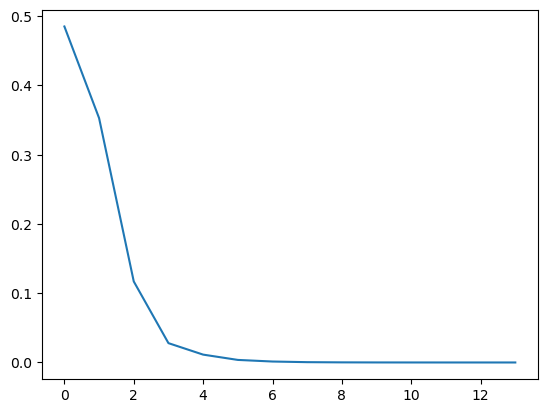

In [397]:
# Plotting the probability of each node to be infected at the starting time (probability to be the source)
plt.plot(marg[0,:])

In [398]:
if snn[:,int(np.argmax(marg[:,0]))][0]==1:
    print("Source correctly identified")
else: print("Source not identified")

Source not identified


In [273]:
from measures import ti_inferred, ti_random, SE, MSE, ti_star, OV, MOV, OV_rnd, MOV_rnd

In [274]:
M0 = np.array([marg[:,0],1 - marg[:, 0],np.zeros_like(marg[:,0])])
ov0 = OV(snn[0], np.argmax(M0[0],axis=0))
ov0_rnd = OV_rnd(snn[0], M0)
mov0 = MOV(M0)
mov0_rnd = MOV_rnd(M0)

In [275]:
ov0

0.9889

In [276]:
print(ov0)
print(mov0)

0.9889
0.99


In [277]:
ti_str = ti_star(snn)
ti_inf = ti_inferred(marg)
ti_rnd = ti_random(marg)
se = SE(ti_str, ti_inf)
mse = MSE(marg, ti_inf)

In [278]:
ti_inf

array([4.65850317, 4.65850317, 4.65850317, ..., 4.65850317, 4.65850317,
       4.65850317])

In [279]:
ti_rnd

array([4.65850317, 4.65850317, 4.65850317, ..., 4.65850317, 4.65850317,
       4.65850317])

In [280]:
se

3.859757814957967

In [281]:
mse

3.8736658620354327

In [282]:
list_se = []
for _ in range(200):
    snn = np.array(simulate_one_detSIR(G, s_type = "delta", S = delta, mask = ["SI"], T_max=100))
    ti_str = ti_star(snn)
    list_se.append(SE(ti_str, ti_inf))

In [283]:
list_se_01 = list_se
mse_01 = mse
print(np.mean(list_se), r"$\pm$",np.std(list_se))

3.903894556139976 $\pm$ 0.09510330142960288


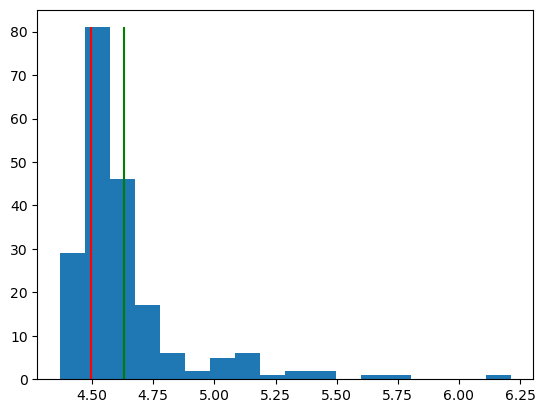

In [286]:
a = plt.hist(list_se_0025, bins=18)
plt.vlines(mse_0025,0,a[0].max(),'red')
plt.vlines(np.mean(list_se_0025),0,a[0].max(),'green')

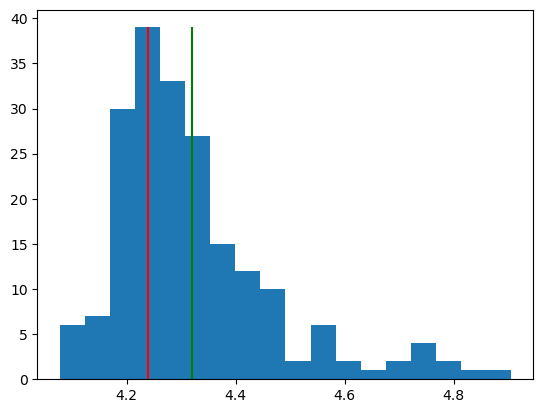

In [288]:
a = plt.hist(list_se_005, bins=18)
plt.vlines(mse_005,0,a[0].max(),'red')
plt.vlines(np.mean(list_se_005),0,a[0].max(),'green')

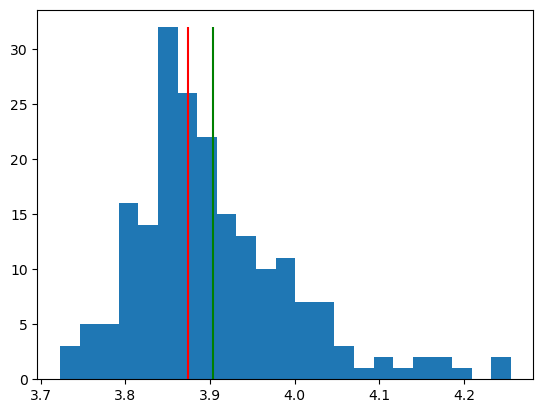

In [290]:
a = plt.hist(list_se_01, bins=23)
plt.vlines(mse_01,0,a[0].max(),'red')
plt.vlines(np.mean(list_se_01),0,a[0].max(),'green')

## Random Regular Graph - Snapshot

In [144]:
snap_time=12
mask = ["SI"]
mask = [1]

In [145]:
N=10000
d=3
lam=0.6
delta=0.2
G=nx.random_regular_graph(d,N)
for (u,v) in G.edges():
    G.edges[u,v]['lambda'] = lam
if (N<500) : nx.draw(G)

In [146]:
snn = np.array(simulate_one_detSIR(G, s_type = "delta", S = delta, mask = mask, T_max=100))[:snap_time+1]

In [147]:
T = len(snn) - 1
print(T)

12


In [148]:
from gen import generate_contacts
contacts = generate_contacts(G,snap_time,lam)

#### Observations

In [151]:
from gen import generate_snapshot_obs
rho= 1
obs = generate_snapshot_obs(snn, o_type="rho", M=1, snap_time=snap_time)[0]

In [152]:
fg_ = fg.FactorGraph(N,snap_time,contacts,[],delta=delta,mask=mask)
fg_.update(maxit=1000)

(14, [9.367506770274758e-17, 2.7588589120313064e-17])

In [ ]:
fg_.reset_obs(obs)  
fg_.update(maxit=1000)

(13, [6.0874805720471936e-05, 6.137309541833117e-07])

In [153]:
marg = fg_.marginals()

In [154]:
np.shape(marg)

(10000, 14)

-1.0


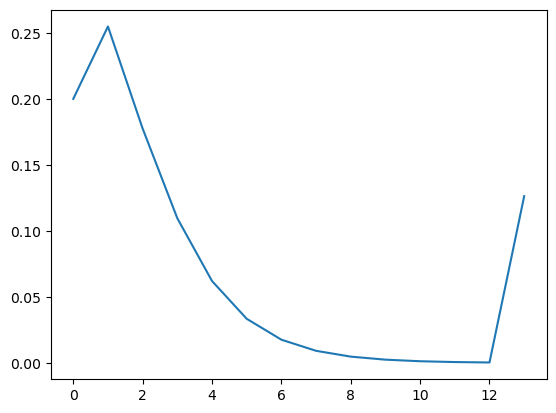

In [155]:
# Plotting the probability of each node to be infected at the starting time (probability to be the source)
i=9
plt.plot(marg[i,:])
print(ti_str[i])

In [156]:
sum(ti_str>12)

0

In [157]:
obs[10:20]

[(2852, 2, 12),
 (7800, 2, 12),
 (7946, 2, 12),
 (3789, 0, 12),
 (5515, 2, 12),
 (7511, 2, 12),
 (7175, 2, 12),
 (8532, 0, 12),
 (4263, 0, 12),
 (420, 2, 12)]

In [158]:
for o in obs:
    if o[1]==2:
        if 1 not in snn[:,o[0]]:
            print(o)

In [159]:
for o in obs:
    if o[0]==i:
        print(o)

(9, 2, 12)


In [160]:
from measures import ti_inferred, ti_random, SE, MSE, ti_star, OV, MOV, OV_rnd, MOV_rnd

In [161]:
M0 = np.array([1 - marg[:, 0],marg[:,0],np.zeros_like(marg[:,0])])
ov0 = OV(snn[0], np.argmax(M0,axis=0))
ov0_rnd = OV_rnd(snn[0], M0)
mov0 = MOV(M0)
mov0_rnd = MOV_rnd(M0)

In [162]:
np.argmax(M0,axis=0).sum()

0

In [163]:
print(ov0)
print(mov0)

0.789
0.7999999999999995


In [164]:
ti_str = ti_star(snn,snap_time)
ti_inf = ti_inferred(marg)
ti_rnd = ti_random(marg)
se = SE(ti_str, ti_inf)
mse = MSE(marg, ti_inf)

In [165]:
SE(ti_str, ti_rnd)

15.251224165112069

In [166]:
print(se)
print(mse)

15.251224165112031
16.40656349833109


In [59]:
ti_inf

array([-0.24322961, -0.23233924, -0.21271847, ..., -0.3483333 ,
       13.        , 13.        ])

In [60]:
ti_rnd[:10]

array([2.8850843, 2.8850843, 2.8850843, 2.8850843, 2.8850843, 2.8850843,
       2.8850843, 2.8850843, 2.8850843, 2.8850843])

In [61]:
for o in obs:
    if o[1] == 1:
        print(o)

In [62]:
snn[0][2]

1

In [63]:
for i,t in enumerate(ti_str):
    if t == 9 : print(i,t)

In [64]:
ti_str[21]

-1.0

In [65]:
ti_inf[21]

-0.29312349339275534

In [66]:
ti_rnd[21]

2.885084298353312

In [332]:
se

1.2039704652208811

In [333]:
mse

1.2482035021303424

In [335]:
snn = np.array(simulate_one_detSIR(G, s_type = "delta", S = delta, mask =  mask, T_max=100))[:snap_time+1]
ti_str = ti_star(snn)
ti_inf = ti_inferred(marg)
se = SE(ti_str, ti_inf)
se

45.06538450923072

In [223]:
sum(ti_str==10)

5

In [216]:
marg[0,:]

array([0.2       , 0.1770496 , 0.17724403, 0.15892482, 0.12438706,
       0.08291425, 0.04618922, 0.02133089, 0.00821761, 0.00269705,
       0.00077747, 0.00026799])

In [240]:
ti_str[:200]

array([ 2., 10.,  0., 10., 10., -1.,  0., 10., 10.,  0., 10., -1.,  0.,
       10.,  0.,  4., 10.,  3.,  0.,  1., 10., -1.,  2., 10., 10.,  1.,
        0., -1., 10.,  0.,  3., -1., 10., -1., -1., 10., 10., -1., 10.,
        1., 10.,  0., -1., 10.,  0.,  2., -1.,  2., 10., -1., 10.,  3.,
        0., -1.,  1., -1., 10.,  0., -1., 10.,  0., -1., 10.,  0., 10.,
        4., 10., 10., -1., 10., 10., 10., 10., 10.,  0., 10.,  0.,  1.,
        1., 10.,  0., -1., 10., 10., 10.,  3.,  0.,  0.,  0., 10., -1.,
       -1., 10., -1., -1., 10., 10., 10., 10., 10., 10., 10.,  3., 10.,
       10.,  0., 10., -1., -1., -1., 10.,  0., -1.,  1., -1., 10.,  0.,
       -1., 10., 10., -1., 10., -1., 10.,  0.,  1., 10., -1., 10.,  0.,
       -1., 10., -1.,  0., 10., -1.,  2., 10., 10., -1.,  1., 10., 10.,
       10., -1., 10., -1.,  0., -1.,  0., -1.,  1., 10., 10.,  0., 10.,
       10., 10., 10., 10.,  1., 10., -1., 10., 10.,  0., 10., 10.,  1.,
        0., -1.,  2., 10.,  3., -1., 10., -1.,  0.,  1., 10.,  3

In [241]:
ti_inf[:200]

array([1.44762016, 1.44762016, 1.44762016, 1.44762016, 1.44762016,
       1.44762016, 1.44762016, 1.44762016, 1.44762016, 1.44762016,
       1.44762016, 1.44762016, 1.44762016, 1.44762016, 1.44762016,
       1.44762016, 1.44762016, 1.44762016, 1.44762016, 1.44762016,
       1.44762016, 1.44762016, 1.44762016, 1.44762016, 1.44762016,
       1.44762016, 1.44762016, 1.44762016, 1.44762016, 1.44762016,
       1.44762016, 1.44762016, 1.44762016, 1.44762016, 1.44762016,
       1.44762016, 1.44762016, 1.44762016, 1.44762016, 1.44762016,
       1.44762016, 1.44762016, 1.44762016, 1.44762016, 1.44762016,
       1.44762016, 1.44762016, 1.44762016, 1.44762016, 1.44762016,
       1.44762016, 1.44762016, 1.44762016, 1.44762016, 1.44762016,
       1.44762016, 1.44762016, 1.44762016, 1.44762016, 1.44762016,
       1.44762016, 1.44762016, 1.44762016, 1.44762016, 1.44762016,
       1.44762016, 1.44762016, 1.44762016, 1.44762016, 1.44762016,
       1.44762016, 1.44762016, 1.44762016, 1.44762016, 1.44762